## Importing necessary libraries
**MNIST dataset** 
- A large database of handwritten digits that is commonly used for training various image processing systems.
- we can import it through keras 


In [3]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [4]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28*28).astype('float32') / 255.0

In [6]:
len(x_train)

60000

In [7]:
len(x_test)

10000

## Writing the model
### Implementation of Competitive learning Algorithm using sequential

In [98]:
# Define the competitive learning model
def competitive_learning_model(num_neurons):
    model = Sequential()
    model.add(Dense(num_neurons, input_shape=(784,), activation='linear'))
    model.add(Dense(10, activation='softmax'))  # Output layer with 10 neurons for digit classification
    return model

# Set the number of neurons in the competitive layer
num_neurons = 100

# Create and compile the model
model = competitive_learning_model(num_neurons)
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Training parameters
epochs = 2
batch_size = 128
desired_accuracy = 0.90

# Convert the labels to one-hot encoded format
y_train_one_hot = keras.utils.to_categorical(y_train, 10)

## Training of the model

In [99]:
# Training with competitive learning
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    for i in range(0, len(x_train), batch_size):
        batch_x = x_train[i:i+batch_size]
        
        # Compute the activations for the competitive layer
        competitive_layer_activations = model.predict(batch_x)

        # Find the winner neuron for each input in the batch
        winner_indices = np.argmax(competitive_layer_activations, axis=1)

        # Update the weights of the winner neurons to be closer to the input data
        for j, winner_idx in enumerate(winner_indices):
            model.layers[0].weights[0][:, winner_idx].assign(
                model.layers[0].weights[0][:, winner_idx] + 0.01 * (batch_x[j] - model.layers[0].weights[0][:, winner_idx])
            )

Epoch 1/2
4/4 [==============================] - 0s 2ms/step


3/3 [==============================] - 0s 2ms/step
Epoch 2/2
4/4 [==============================] - 0s 2ms/step


3/3 [==============================] - 0s 2ms/step


## Evaluation of the model on the testing set.

In [102]:
test_loss, test_accuracy = model.evaluate(x_test, keras.utils.to_categorical(y_test, 10), verbose=0)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.08919999748468399


## Visualizing the weight vectors

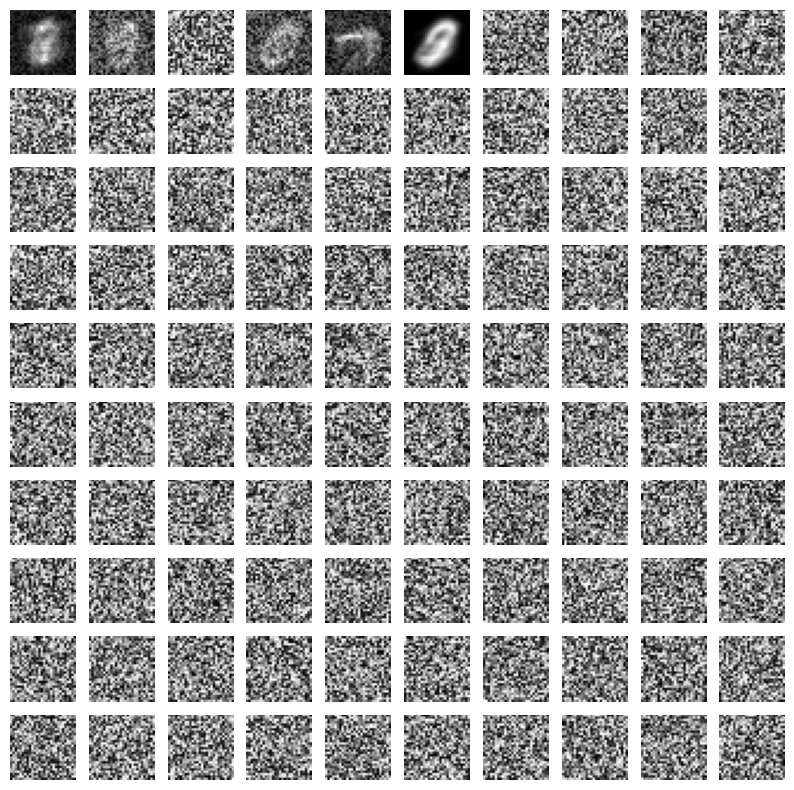

In [103]:
from matplotlib import pyplot as plt
def plot_weight_vectors(model, num_neurons):
    weights = model.layers[0].get_weights()[0]
    fig, axes = plt.subplots(10, 10, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        weight_vector = weights[:, i]
        weight_image = weight_vector.reshape(28, 28)
        ax.imshow(weight_image, cmap='gray')
        ax.axis('off')
    plt.show()

# Call the function to plot the weight vectors
plot_weight_vectors(model, num_neurons)